# **Machine Downtime**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
# Read the csv file
df = pd.read_csv('/content/MachineDowntime_csv.csv')
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [ ]:
import pandas as pd

# Example dataset



# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Find start date (min date)
start_date = df['Date'].min()

# Find end date (max date)
end_date = df['Date'].max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")


Start Date: 2021-11-24 00:00:00
End Date: 2022-07-03 00:00:00


<ipython-input-3-e1b92502b651>:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# number of rows and columns
df.shape

(2500, 16)

In [ ]:
# Checking the structure of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2500 non-null   datetime64[ns]
 1   Machine_ID                       2500 non-null   object        
 2   Assembly_Line_No                 2500 non-null   object        
 3   Hydraulic_Pressure(bar)          2490 non-null   float64       
 4   Coolant_Pressure(bar)            2481 non-null   float64       
 5   Air_System_Pressure(bar)         2483 non-null   float64       
 6   Coolant_Temperature              2488 non-null   float64       
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64       
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64       
 9   Spindle_Vibration(µm)            2489 non-null   float64       
 10  Tool_Vibration(µm)               2489 non-null   float64    

In [ ]:
# Display the column names
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [ ]:
# Renaming the columns
# Creating a dictionary for renaming
new_column_names = {
    "Date": "date",
    "Machine_ID": "machine_id",
    "Assembly_Line_No": "assembly_line_no",
    "Hydraulic_Pressure(bar)": "hydraulic_pressure",
    "Coolant_Pressure(bar)": "coolant_pressure",
    "Air_System_Pressure(bar)": "air_system_pressure",
    "Coolant_Temperature": "coolant_temperature",
    "Hydraulic_Oil_Temperature(°C)": "hydraulic_oil_temperature",
    "Spindle_Bearing_Temperature(°C)": "spindle_bearing_temperature",
    "Spindle_Vibration(µm)": "spindle_vibration",
    "Tool_Vibration(µm)": "tool_vibration",
    "Spindle_Speed(RPM)": "spindle_speed",
    "Voltage(volts)": "voltage",
    "Torque(Nm)": "torque",
    "Cutting(kN)": "cutting_force",
    "Downtime": "downtime"
}


df = df.rename(columns=new_column_names)
print(df.head())


        date            machine_id assembly_line_no  hydraulic_pressure  \
0 2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1               71.04   
1 2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1              125.33   
2 2021-12-31  Makino-L3-Unit1-2015     Shopfloor-L3               71.12   
3 2022-05-31  Makino-L2-Unit1-2015     Shopfloor-L2              139.34   
4 2022-03-31  Makino-L1-Unit1-2013     Shopfloor-L1               60.51   

   coolant_pressure  air_system_pressure  coolant_temperature  \
0          6.933725             6.284965                 25.6   
1          4.936892             6.196733                 35.3   
2          6.839413             6.655448                 13.1   
3          4.574382             6.560394                 24.4   
4          6.893182             6.141238                  4.1   

   hydraulic_oil_temperature  spindle_bearing_temperature  spindle_vibration  \
0                       46.0                         33.4              1.291  

In [ ]:
# Check the data type of the column
df.dtypes

,0
date,datetime64[ns]
machine_id,object
assembly_line_no,object
hydraulic_pressure,float64
coolant_pressure,float64
air_system_pressure,float64
coolant_temperature,float64
hydraulic_oil_temperature,float64
spindle_bearing_temperature,float64
spindle_vibration,float64


In [ ]:
# Coverting date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
print(df.dtypes)


date                           datetime64[ns]
machine_id                             object
assembly_line_no                       object
hydraulic_pressure                    float64
coolant_pressure                      float64
air_system_pressure                   float64
coolant_temperature                   float64
hydraulic_oil_temperature             float64
spindle_bearing_temperature           float64
spindle_vibration                     float64
tool_vibration                        float64
spindle_speed                         float64
voltage                               float64
torque                                float64
cutting_force                         float64
downtime                               object
dtype: object


In [ ]:
# First five rows of the datframe
df.head()

,date,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting_force,downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [ ]:
# Check the null values in columns
df.isnull().sum()

,0
date,0
machine_id,0
assembly_line_no,0
hydraulic_pressure,10
coolant_pressure,19
air_system_pressure,17
coolant_temperature,12
hydraulic_oil_temperature,16
spindle_bearing_temperature,7
spindle_vibration,11


In [ ]:
# Total number of null values
total_nulls = df.isnull().sum().sum()
print(total_nulls)

143


In [ ]:
# Calculate the percentage of missing values
missing_values = df.isnull().sum()
print(missing_values)


date                            0
machine_id                      0
assembly_line_no                0
hydraulic_pressure             10
coolant_pressure               19
air_system_pressure            17
coolant_temperature            12
hydraulic_oil_temperature      16
spindle_bearing_temperature     7
spindle_vibration              11
tool_vibration                 11
spindle_speed                   6
voltage                         6
torque                         21
cutting_force                   7
downtime                        0
dtype: int64


In [ ]:

missing_percentage = (missing_values / len(df)) * 100

# Display the missing values count and percentage

print(missing_percentage)


date                           0.00
machine_id                     0.00
assembly_line_no               0.00
hydraulic_pressure             0.40
coolant_pressure               0.76
air_system_pressure            0.68
coolant_temperature            0.48
hydraulic_oil_temperature      0.64
spindle_bearing_temperature    0.28
spindle_vibration              0.44
tool_vibration                 0.44
spindle_speed                  0.24
voltage                        0.24
torque                         0.84
cutting_force                  0.28
downtime                       0.00
dtype: float64


In [ ]:
# Checking the duplicate rows
df.duplicated().sum()

0

In [ ]:
# removing null values because the percentage of null values is very less. so removing null values cannot effect the analysis
df.dropna(inplace=True)


In [ ]:
df

,date,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting_force,downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,131.894307,5.221555,6.573392,22.4,45.5,32.5,1.276,23.430,20978.0,390.0,22.757270,2.94,No_Machine_Failure
2495,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2498,2022-02-01,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


# First moment business decision: 1

1.mean

2.Median

3.Mode

In [ ]:
# with the help of describe we can find mean and median of the numerical columns
df.describe()

,date,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting_force
count,2381,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,2022-03-13 12:00:54.430911488,101.184167,4.955532,6.499094,18.518774,47.616422,35.064763,1.007646,25.415098,20271.568249,349.101638,25.196960,2.785586
min,2021-11-24 00:00:00,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,3.469000,0.000000,202.000000,0.000000,1.800000
25%,2022-02-22 00:00:00,76.220000,4.470511,6.218482,10.500000,45.100000,32.500000,0.777000,21.056000,17919.000000,319.000000,21.653830,2.270000
50%,2022-03-14 00:00:00,96.165147,4.940503,6.505191,21.100000,47.700000,35.100000,1.007000,25.437000,20126.000000,349.000000,24.633746,2.770000
75%,2022-04-02 00:00:00,126.302016,5.526438,6.780411,25.600000,50.100000,37.600000,1.233000,29.826000,22492.000000,380.000000,30.514008,3.270000
max,2022-06-19 00:00:00,191.000000,11.350000,7.973992,36.500000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000
std,NaN,30.323683,1.000772,0.406355,8.360034,3.757603,3.764735,0.341260,6.455127,3853.673196,45.277313,6.151921,0.615749


In [ ]:
# Calculating mode for categorical columns
categorical_columns = ['machine_id', 'assembly_line_no','downtime']
categorical_mode = df[categorical_columns].mode()
print(categorical_mode)


             machine_id assembly_line_no         downtime
0  Makino-L1-Unit1-2013     Shopfloor-L1  Machine_Failure


**# Second Moment business decision:2**

1.variance

2.Standard deviation

3.range

In [ ]:
# Calculating variance for all numerical columns
variance = df.select_dtypes(include=['float64', 'int64']).var()

print(variance)

hydraulic_pressure             9.195258e+02
coolant_pressure               1.001545e+00
air_system_pressure            1.651243e-01
coolant_temperature            6.989016e+01
hydraulic_oil_temperature      1.411958e+01
spindle_bearing_temperature    1.417323e+01
spindle_vibration              1.164584e-01
tool_vibration                 4.166866e+01
spindle_speed                  1.485080e+07
voltage                        2.050035e+03
torque                         3.784614e+01
cutting_force                  3.791473e-01
dtype: float64


In [ ]:
# Calculating Standard deviation for all numerical columns
standard_deviation= df.select_dtypes(include=['float64', 'int64']).std()

print(standard_deviation)

hydraulic_pressure               30.323683
coolant_pressure                  1.000772
air_system_pressure               0.406355
coolant_temperature               8.360034
hydraulic_oil_temperature         3.757603
spindle_bearing_temperature       3.764735
spindle_vibration                 0.341260
tool_vibration                    6.455127
spindle_speed                  3853.673196
voltage                          45.277313
torque                            6.151921
cutting_force                     0.615749
dtype: float64


In [ ]:
#calculate the range (difference between the maximum and minimum) for numerical columns in a DataFrame
range_values = df.select_dtypes(include=['number']).max() - df.select_dtypes(include=['number']).min()
print(range_values)


hydraulic_pressure               205.326454
coolant_pressure                  11.025000
air_system_pressure                2.910511
coolant_temperature               32.400000
hydraulic_oil_temperature         26.200000
spindle_bearing_temperature       26.900000
spindle_vibration                  2.461000
tool_vibration                    42.257000
spindle_speed                  27957.000000
voltage                          277.000000
torque                            55.552400
cutting_force                      2.130000
dtype: float64


**# Third moment business decision:3**

skewness:

In [ ]:
skewness_values = df.select_dtypes(include=['number']).skew()

# Categorized based on skewness
left_skewed = skewness_values[skewness_values < 0]
right_skewed = skewness_values[skewness_values > 0]
symmetric = skewness_values[skewness_values == 0]

print("Left Skewed Columns:")
print(left_skewed)

print("\nRight Skewed Columns:")
print(right_skewed)

print("\nSymmetric Columns:")
print(symmetric)




Left Skewed Columns:
air_system_pressure           -0.056341
coolant_temperature           -0.220429
spindle_bearing_temperature   -0.057013
spindle_vibration             -0.011111
tool_vibration                -0.051378
spindle_speed                 -0.186988
voltage                       -0.035090
dtype: float64

Right Skewed Columns:
hydraulic_pressure           0.206051
coolant_pressure             0.157474
hydraulic_oil_temperature    0.006579
torque                       0.031834
cutting_force                0.121152
dtype: float64

Symmetric Columns:
Series([], dtype: float64)


# **Fourth moment business decision:4**

Kurtosis

In [ ]:
import pandas as pd

# Calculate kurtosis for numerical columns
kurtosis_values = df.select_dtypes(include=['number']).kurt()

# Print kurtosis for all features
print("Kurtosis for Features:")
print(kurtosis_values)




Kurtosis for Features:
hydraulic_pressure            -0.911985
coolant_pressure               1.195076
air_system_pressure            0.006653
coolant_temperature           -1.360550
hydraulic_oil_temperature      0.051123
spindle_bearing_temperature   -0.041116
spindle_vibration             -0.010686
tool_vibration                -0.047534
spindle_speed                  1.431685
voltage                       -0.082821
torque                        -0.444638
cutting_force                 -1.080048
dtype: float64


### **Outlier detection of numerical columns and capping**

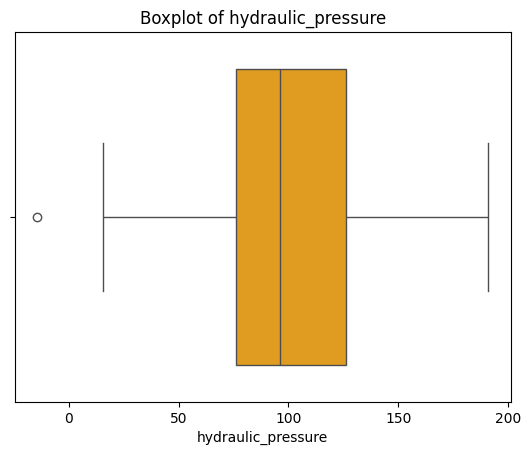

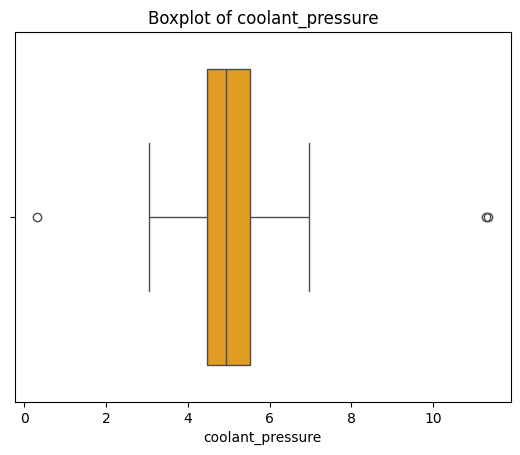

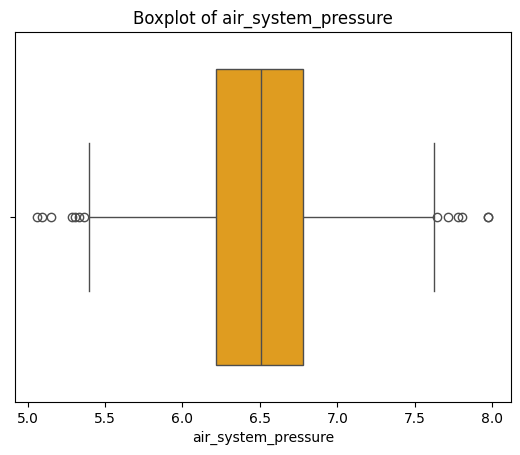

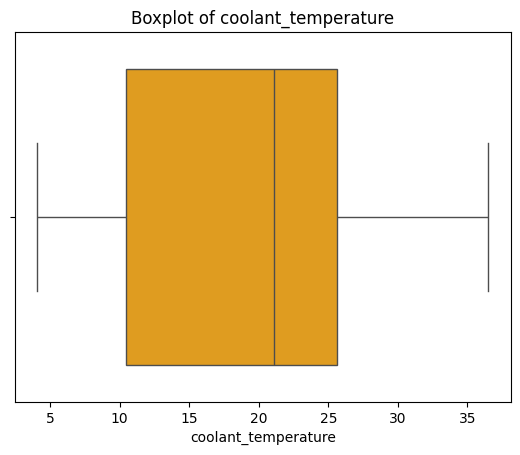

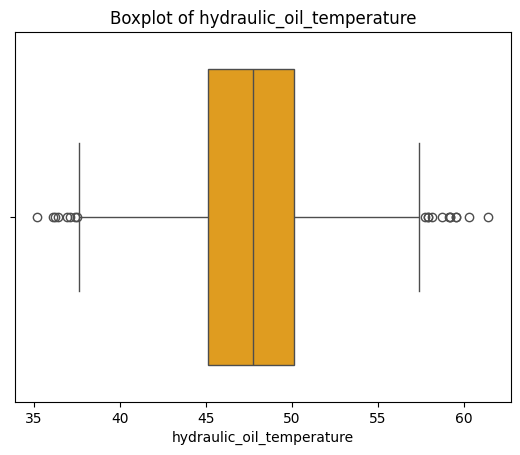

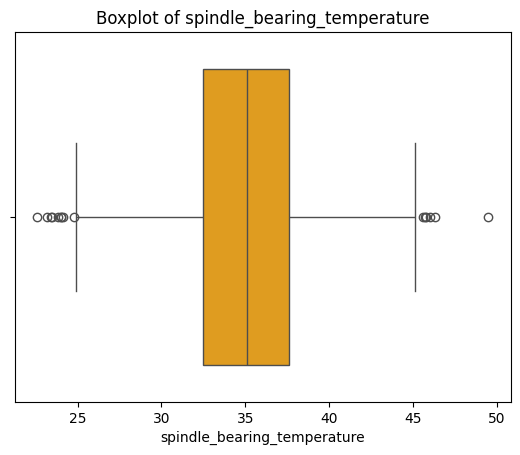

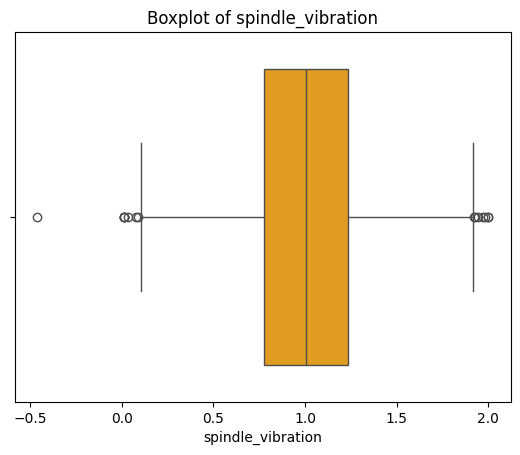

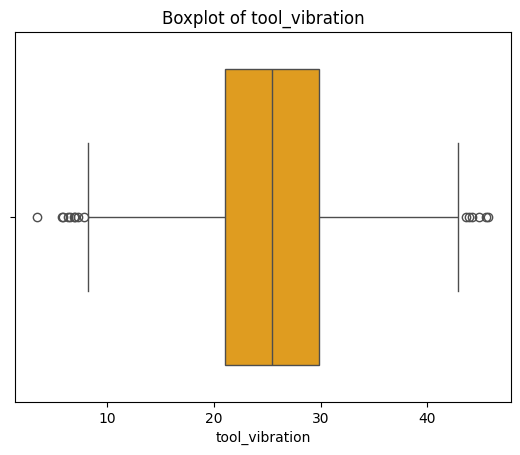

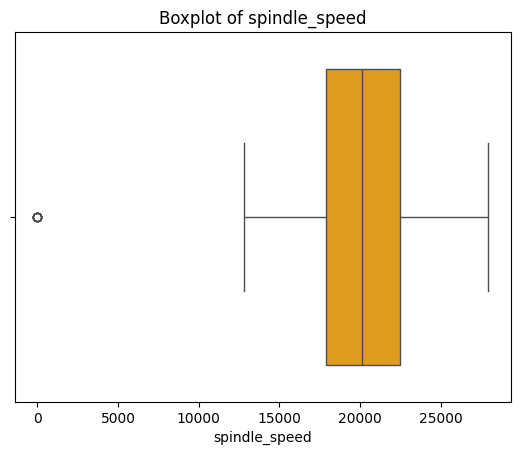

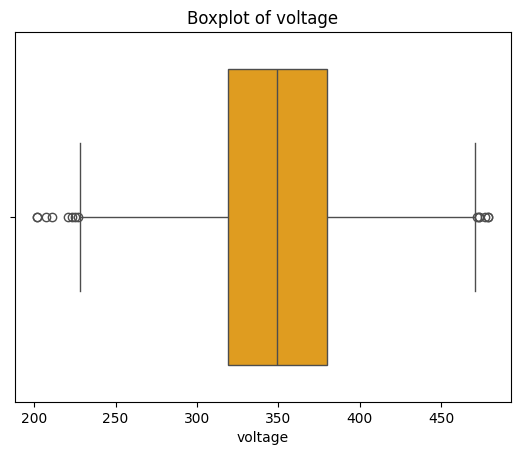

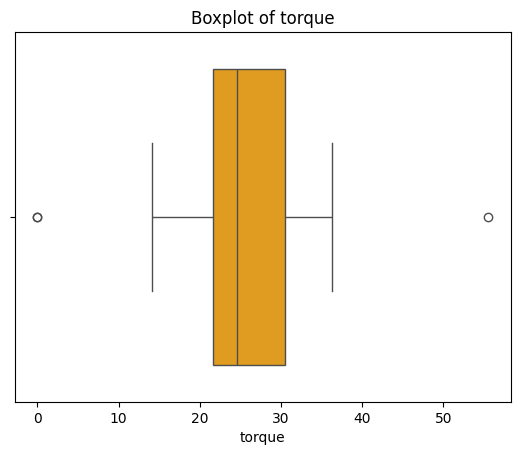

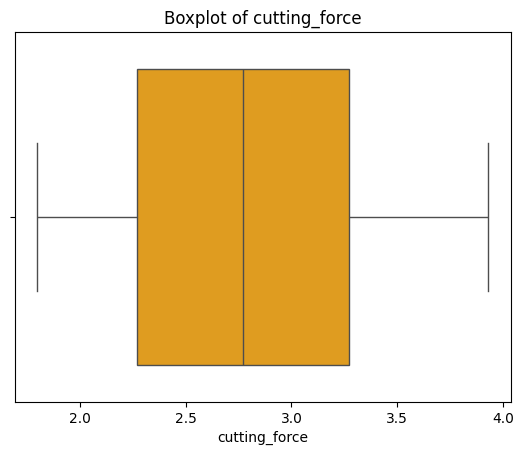

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to analyze
columns_to_analyze = [
    'hydraulic_pressure', 'coolant_pressure', 'air_system_pressure',
    'coolant_temperature', 'hydraulic_oil_temperature', 'spindle_bearing_temperature',
    'spindle_vibration', 'tool_vibration', 'spindle_speed', 'voltage',
    'torque', 'cutting_force'
]

# Loop through the columns and plot each boxplot
for col in columns_to_analyze:
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
numerical_df = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((numerical_df < lower_bound) | (numerical_df > upper_bound))

# Count the number of outliers in each column
outliers_count = outliers.sum()
print(outliers_count)



hydraulic_pressure              1
coolant_pressure                3
air_system_pressure            13
coolant_temperature             0
hydraulic_oil_temperature      20
spindle_bearing_temperature    15
spindle_vibration              15
tool_vibration                 15
spindle_speed                   7
voltage                        14
torque                          3
cutting_force                   0
dtype: int64


In [ ]:
# Loop through each numeric column to cap the outliers
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate Q1 and Q3 for each column
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers by replacing them with the upper and lower bounds
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])  # Cap upper outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])  # Cap lower outliers




In [ ]:
df.describe()

,date,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting_force
count,2381,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,2022-03-13 12:00:54.430911488,101.190645,4.953067,6.499046,18.518774,47.612516,35.06596,1.007913,25.416878,20304.082528,349.134397,25.199052,2.785586
min,2021-11-24 00:00:00,1.096976,2.886620,5.375588,4.100000,37.600000,24.85000,0.093000,7.901000,11059.500000,227.500000,8.363564,1.800000
25%,2022-02-22 00:00:00,76.220000,4.470511,6.218482,10.500000,45.100000,32.50000,0.777000,21.056000,17919.000000,319.000000,21.653830,2.270000
50%,2022-03-14 00:00:00,96.165147,4.940503,6.505191,21.100000,47.700000,35.10000,1.007000,25.437000,20126.000000,349.000000,24.633746,2.770000
75%,2022-04-02 00:00:00,126.302016,5.526438,6.780411,25.600000,50.100000,37.60000,1.233000,29.826000,22492.000000,380.000000,30.514008,3.270000
max,2022-06-19 00:00:00,191.000000,7.110329,7.623305,36.500000,57.600000,45.25000,1.917000,42.981000,27957.000000,471.500000,43.804275,3.930000
std,NaN,30.300636,0.981905,0.403519,8.360034,3.726394,3.74261,0.339577,6.425858,3727.022604,45.124429,6.108113,0.615749


# **Exploratory data analysis**

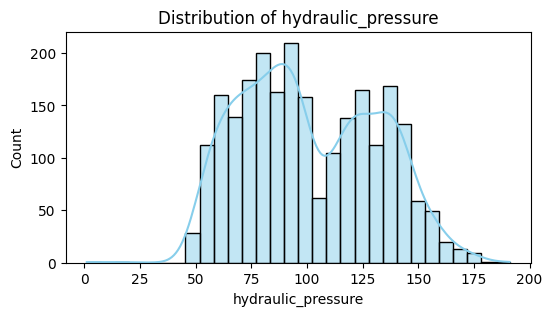

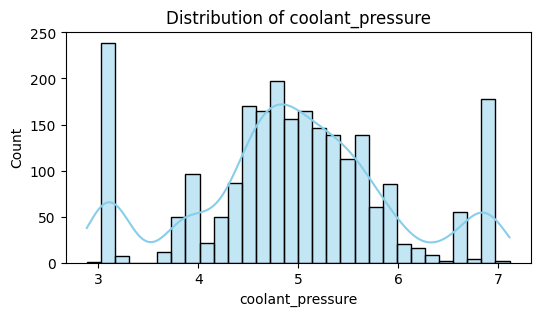

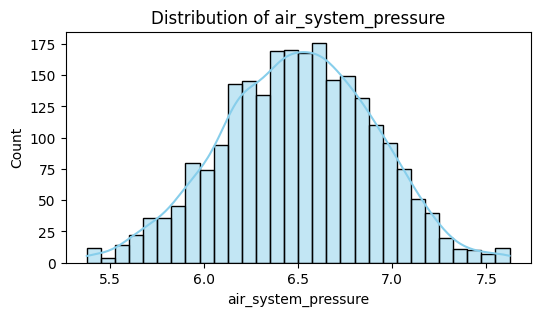

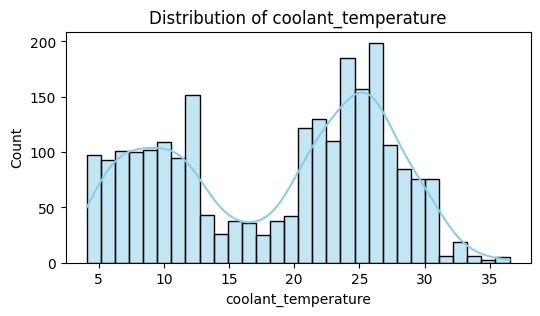

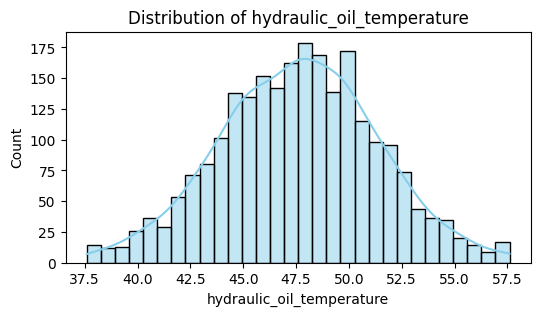

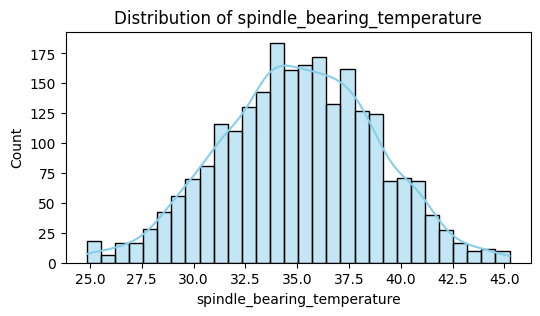

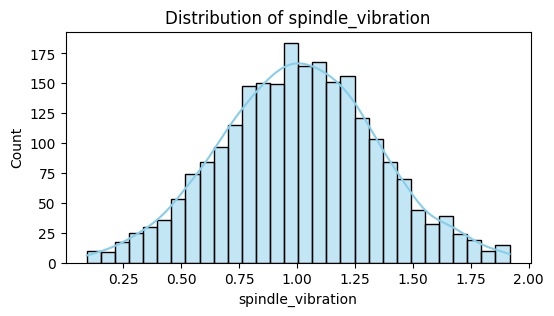

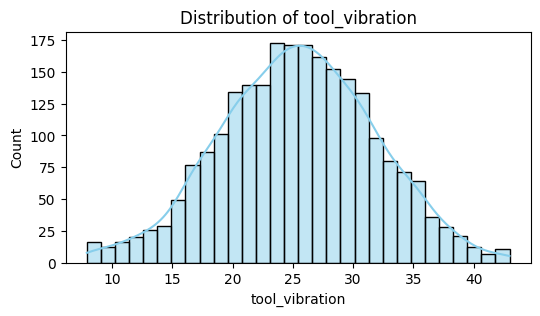

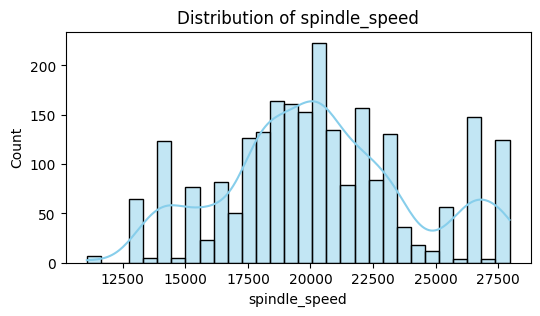

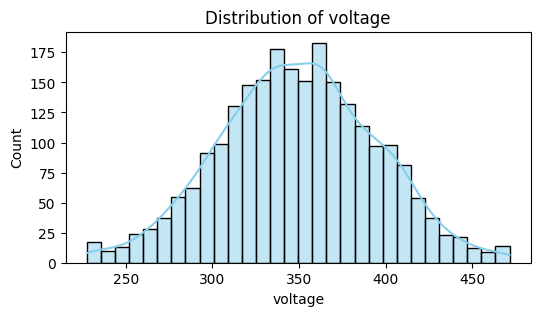

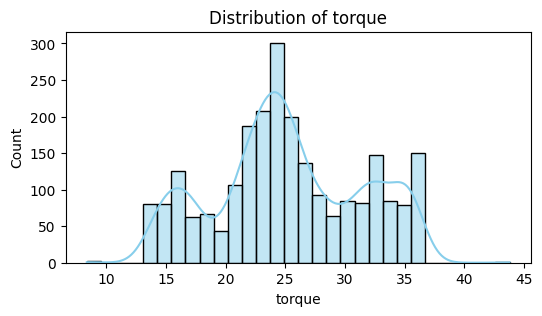

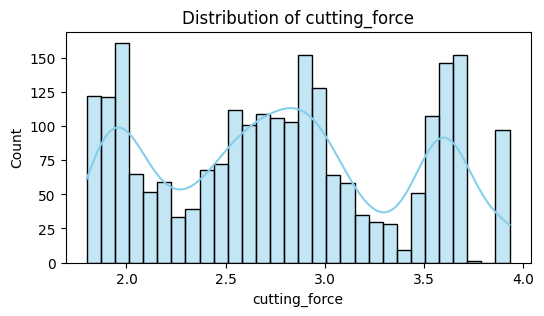

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column and plot histogram
for col in df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(6, 3))  # Even smaller size
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()




Visualizing the relationship between hydraulic_pressure and coolant_pressure:

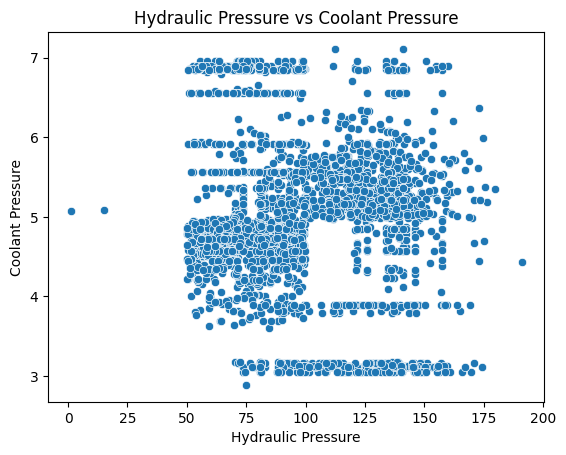

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='hydraulic_pressure', y='coolant_pressure', data=df)
plt.title('Hydraulic Pressure vs Coolant Pressure')
plt.xlabel('Hydraulic Pressure')
plt.ylabel('Coolant Pressure')
plt.show()


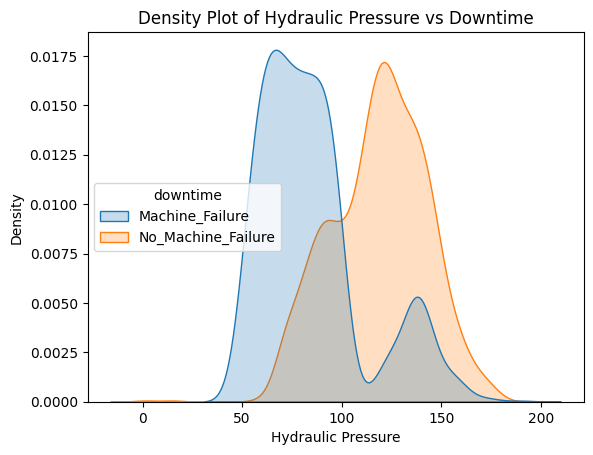

In [ ]:
# Density Plot for Hydraulic Pressure based on Downtime categories
sns.kdeplot(data=df, x='hydraulic_pressure', hue='downtime', fill=True, common_norm=False)
plt.title('Density Plot of Hydraulic Pressure vs Downtime')
plt.xlabel('Hydraulic Pressure')
plt.ylabel('Density')
plt.show()


<ipython-input-33-53fca90b5c48>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='downtime', palette='viridis')


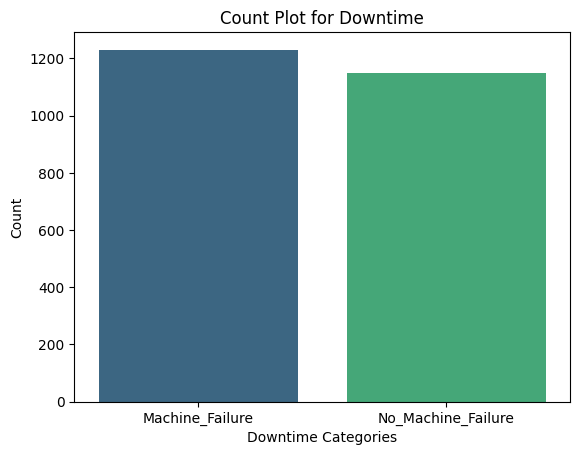

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for downtime
sns.countplot(data=df, x='downtime', palette='viridis')
plt.title('Count Plot for Downtime')
plt.xlabel('Downtime Categories')
plt.ylabel('Count')
plt.show()


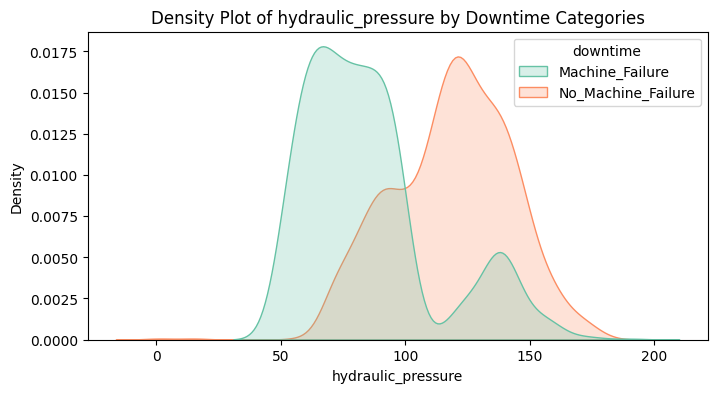

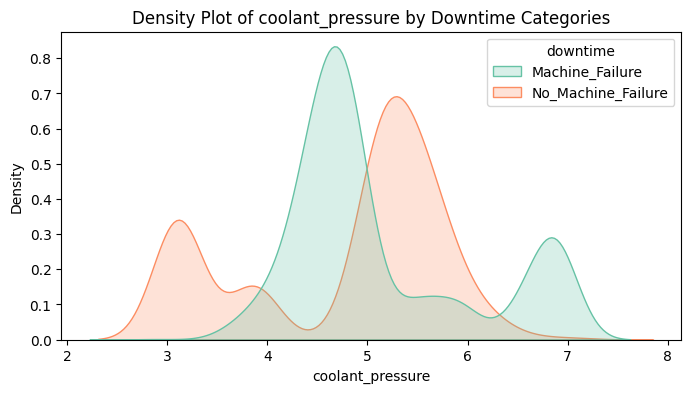

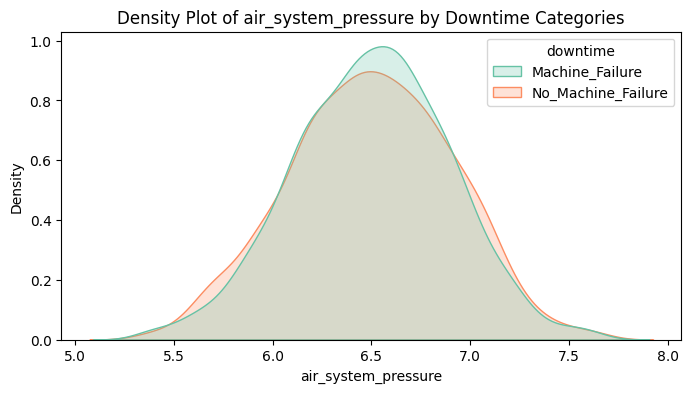

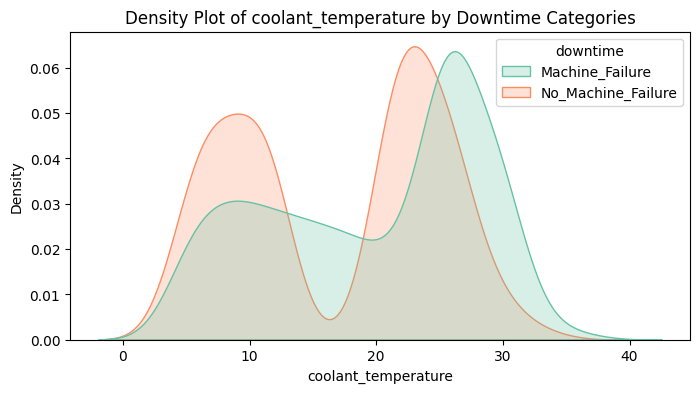

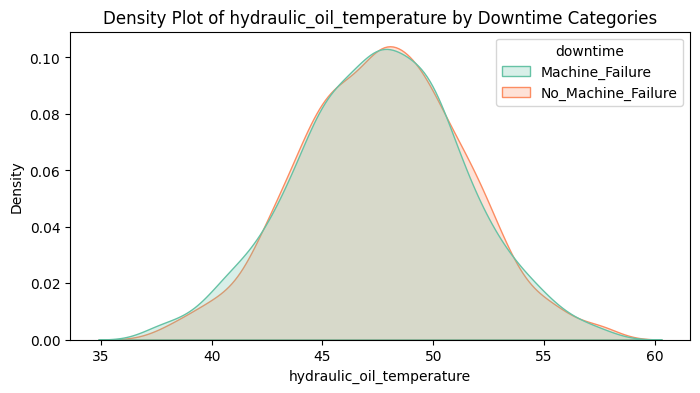

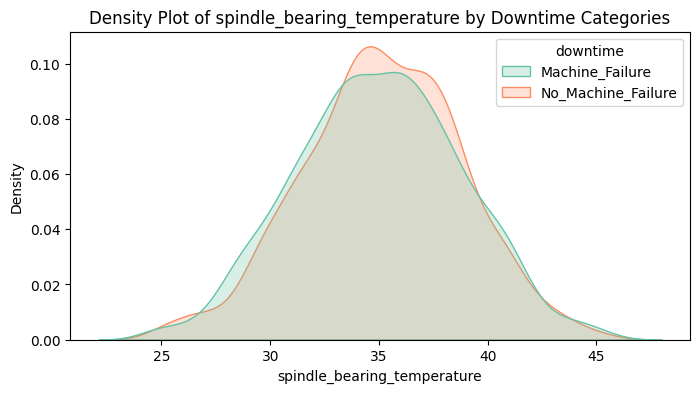

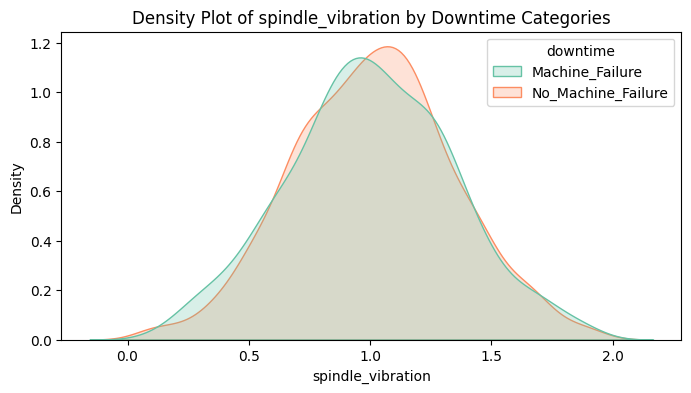

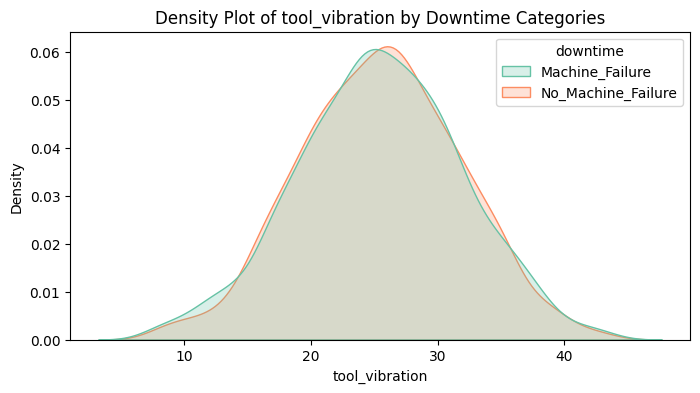

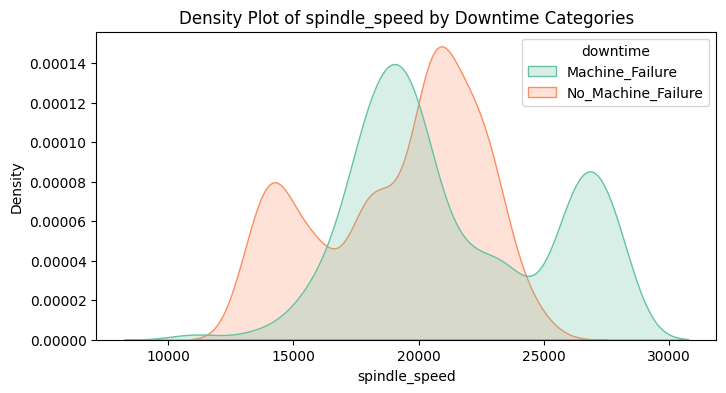

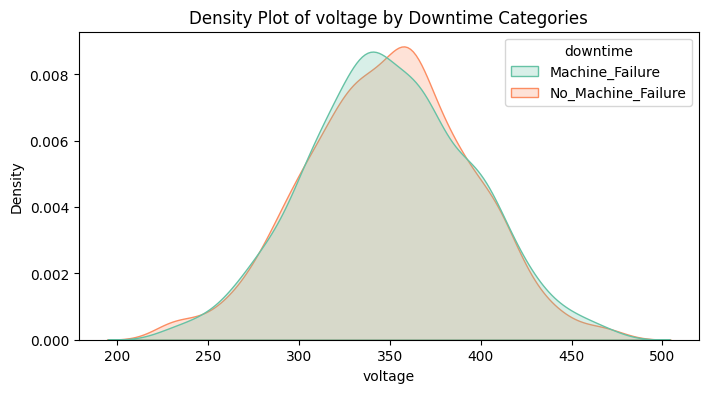

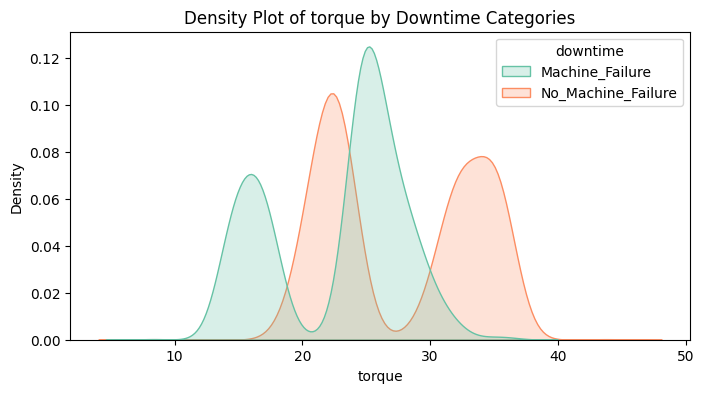

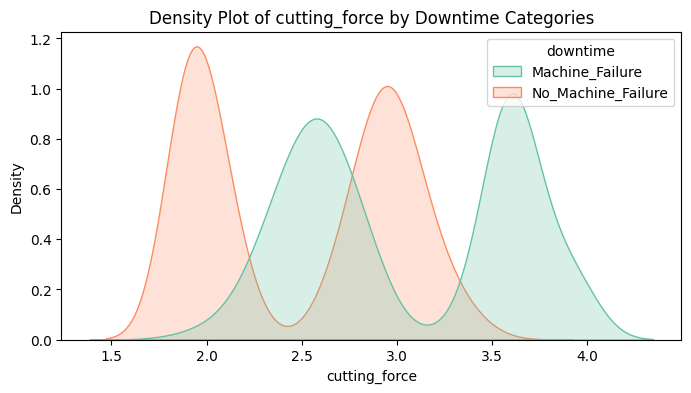

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='downtime', fill=True, common_norm=False, palette='Set2')
    plt.title(f'Density Plot of {col} by Downtime Categories')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


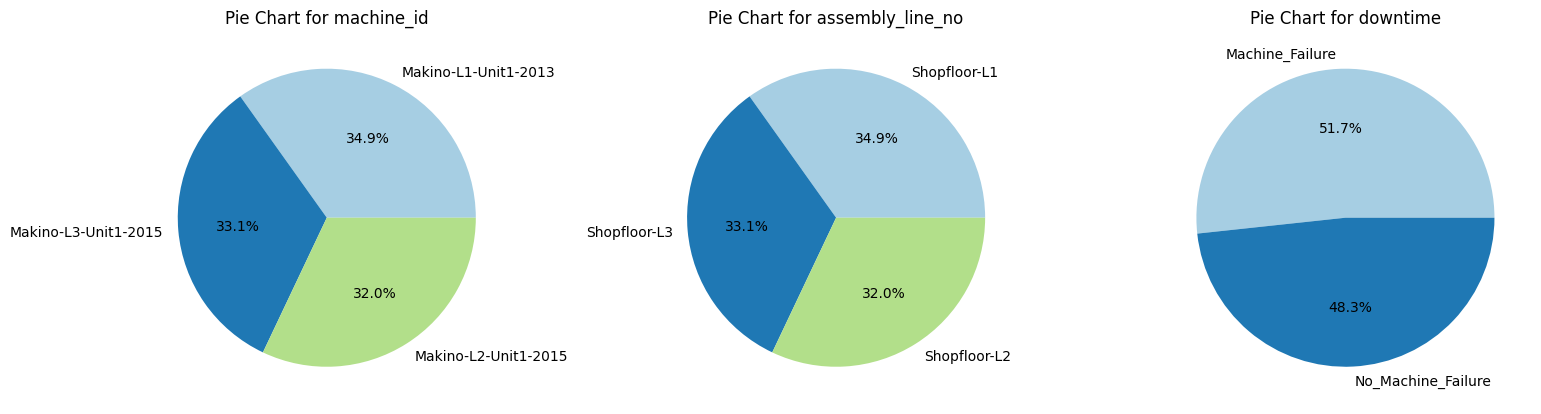

In [ ]:
import matplotlib.pyplot as plt


categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)  #  grid size based on the number of columns
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart for {col}')
    plt.ylabel('')
    plt.tight_layout()
plt.show()


<Axes: >

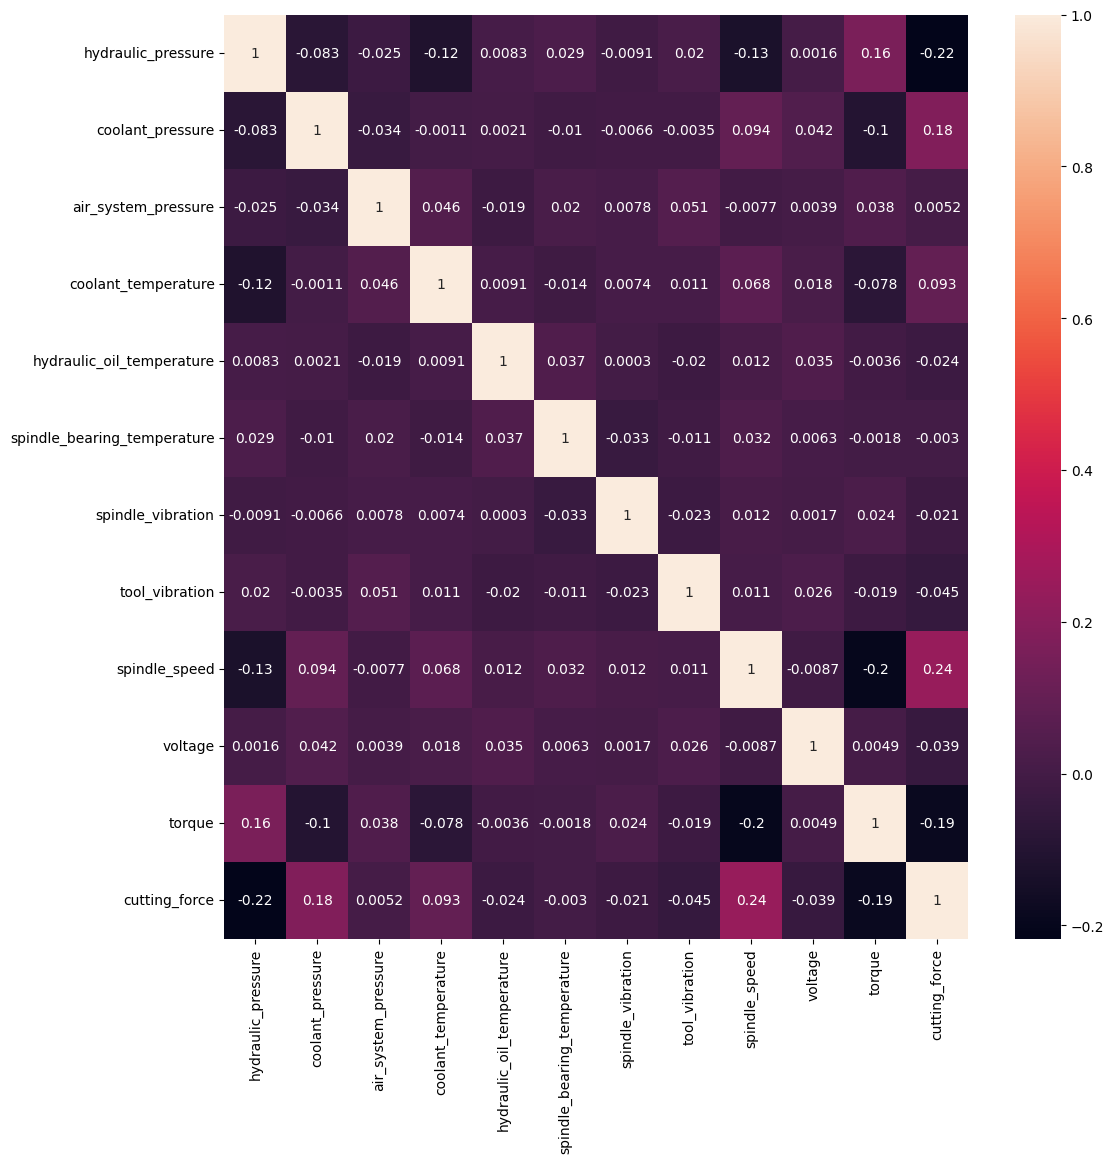

In [ ]:
plt.figure(figsize=(12,12))
s = df.select_dtypes(include = "number").corr()
sns.heatmap(s,annot=True)

